In [39]:
import sys
from pathlib import Path
import importlib

# Adicionar o diretório raiz ao sys.path
sys.path.append(str(Path.cwd().parent / "scripts"))

import investment_and_crypto # type: ignore
importlib.reload(investment_and_crypto)

from assets import ativos
from investment_and_crypto import ( # type: ignore
    baixar_dados,
    carteira_pesos_iguais,
    carteira_otimizada_volatilidade,
    gerar_matriz_correlacao,
    grafico_investment,
)

In [40]:
# Configurações do Usuário
escolhas_usuario = ["PETROBRAS", "ITAU", "JBS", "BB", "BRADESCO", "SANTANDER"]
periodo_usuario = "24M"

[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  1 of 1 completed


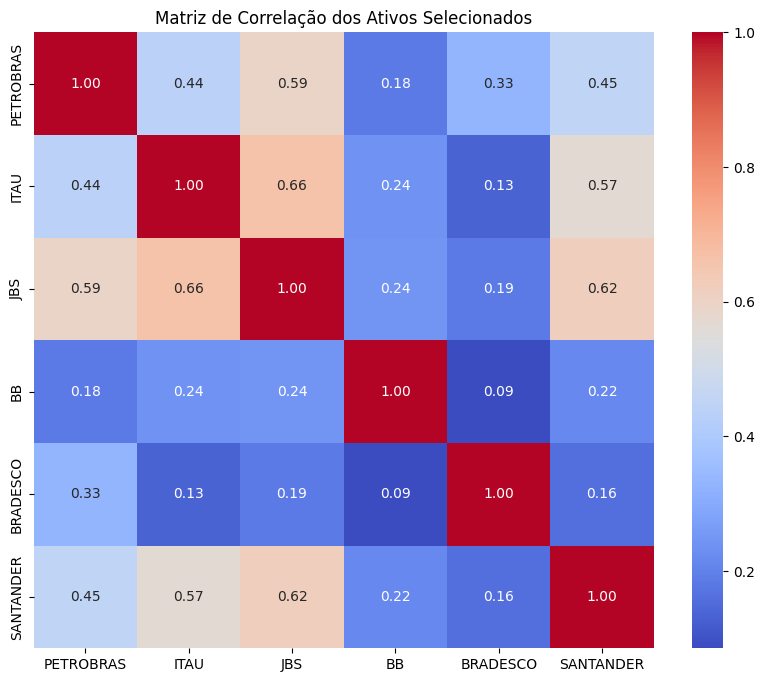

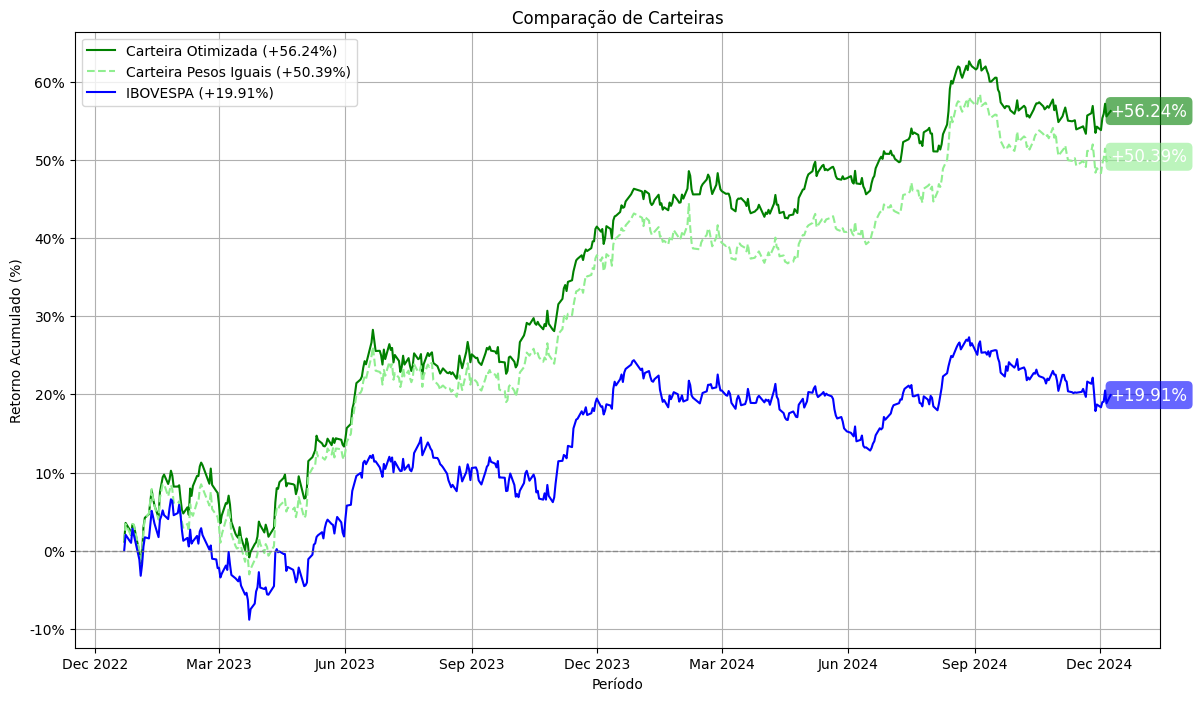


Pesos Iguais da Carteira:
PETROBRAS: 16.67%
ITAU: 16.67%
JBS: 16.67%
BB: 16.67%
BRADESCO: 16.67%
SANTANDER: 16.67%

Pesos Otimizados da Carteira:
PETROBRAS: 23.36%
ITAU: 0.00%
JBS: 21.14%
BB: 15.31%
BRADESCO: 18.47%
SANTANDER: 21.72%


In [41]:
# Baixar Dados dos Ativos Escolhidos
dados_escolhidos = baixar_dados([ativos[ativo] for ativo in escolhas_usuario], periodo_usuario)

# Renomear colunas do DataFrame com os nomes amigáveis (escolhas_usuario)
dados_escolhidos.columns = escolhas_usuario

# Calcular Retornos Diários e Carteiras
retornos = dados_escolhidos.pct_change().dropna()
pesos_iguais, retorno_iguais = carteira_pesos_iguais(retornos)
pesos_otimizados, retorno_otimizado = carteira_otimizada_volatilidade(retornos)

# Comparação com IBOVESPA
dados_ibov = baixar_dados([ativos["IBOVESPA"]], periodo_usuario)
dados_ibov.columns = ["IBOVESPA"]  # Renomear a coluna para manter consistência
retorno_ibov = dados_ibov.pct_change().dropna().cumsum()

# Gerar Matriz de Correlação e Gráfico
gerar_matriz_correlacao(retornos)  # As colunas agora são os nomes personalizados
grafico_investment(retorno_iguais, retorno_otimizado, retorno_ibov, periodo_usuario)

# Exibir Pesos das Carteiras
print("\nPesos Iguais da Carteira:")
for ativo, peso in zip(escolhas_usuario, pesos_iguais):
    print(f"{ativo}: {peso:.2%}")

print("\nPesos Otimizados da Carteira:")
for ativo, peso in zip(escolhas_usuario, pesos_otimizados):
    print(f"{ativo}: {peso:.2%}")